In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import sys
# modify "customized_path_to_homework", path of folder in drive, where you uploaded your homework
customized_path_to_homework = "/content/drive/Shared drives/thesis"
sys.path.append(customized_path_to_homework)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
original = pd.read_excel("/content/drive/Shareddrives/thesis/C_Project4_Origin.xlsx")
# sB = pd.read_excel("/content/drive/Shared drives/thesis/Project4_StrugglingBean.xlsx")

Start of the Code

In [31]:
#Reading how distributed the grades are for Project 4 for Fall 2021
distribution = original.distribution

In [32]:
import collections
counter=collections.Counter(distribution * 10)
print(counter)

Counter({100.0: 137, 90.0: 114, 80.0: 81, 70.0: 72, 60.0: 32, 50.0: 26, 30.0: 15, 40.0: 12})


dict_values([15, 12, 26, 32, 72, 81, 114, 137])

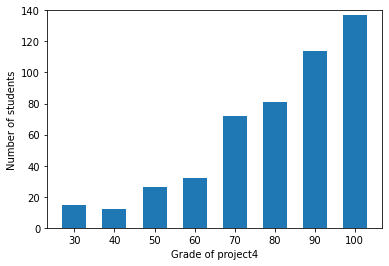

In [33]:
#bar chart for grade distribution
plt.bar(counter.keys(), counter.values(), width = 6)
plt.ylim(0, 140)
plt.xlabel("Grade of project4")
plt.ylabel('Number of students')
counter.values()

Start reading survey data for preprocess.

In [34]:
survey = pd.read_excel("/content/drive/My Drive/research data_actual/SurveyData.xlsx")


In [37]:
#Calculating how distributed the answers are for survey questions (example is with question8, if you want to see other question replace Q8 to different question such as Q4)
surDis1 = survey.Q8.astype(str)
counter2=collections.Counter(surDis1)
print(counter2)

Counter({'Difficult': 187, 'Very difficult': 89, 'Not difficult': 56, 'Easy': 15})


In [36]:
surDis = survey.Q8.astype(str)

In [18]:
counter1=collections.Counter(surDis)
print(counter1)

Counter({'Difficult': 187, 'Very difficult': 89, 'Not difficult': 56, 'Easy': 15})


dict_values([187, 56, 89, 15])

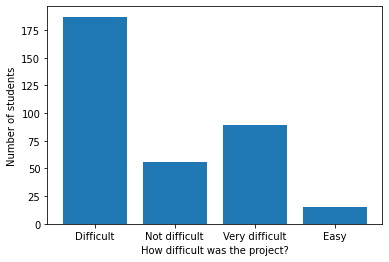

In [38]:
#how distributed answers are for question asking how difficult was project 4?
plt.bar(counter1.keys(), counter1.values())
plt.xlabel("How difficult was the project?")
plt.ylabel('Number of students')
counter1.values()

In [20]:
surveyTemp = pd.read_excel("/content/drive/My Drive/research data_actual/SurveyData.xlsx")

survey data preprocessing from string to int

In [21]:
#converting answers for survey questions to numbers

from re import A
#converting grade each student received for project 4 to numerical values
def categorize_grade(aDataobj):
  if ('90 and above') in aDataobj :
    return 1
  elif('80-89') in aDataobj:
    return 2
  elif('70-79') in aDataobj:
    return 3
  elif('60-69') in aDataobj:
    return 4
  elif('Below 60') in aDataobj:
    return 5
#converting answers for how much help did you receive from office hours and piazza to numerical values
def categorize_helpTA(aDataobj):
  if ('None') in aDataobj :
    return 1
  elif('5 or less') in aDataobj:
    return 2
  elif('6 to 10') in aDataobj:
    return 3
  elif('More than 10 times') in aDataobj:
    return 4
    #converting answers for how often did you attend lecture to numerical values
def categorize_lecture(aDataobj):
  if ('all lectures.') in aDataobj :
    return 1
  elif('most lectures.') in aDataobj:
    return 2
  elif('more than half the lectures.') in aDataobj:
    return 3
  elif('less than half the lectures.') in aDataobj:
    return 4
  elif('only a few lectures.') in aDataobj:
    return 5

#converting answer for if interaction with Staff has helped to numerical values
def categorize_interactionHelped(aDataobj):
  if ('Strongly Agree') in aDataobj :
    return 1
  elif('Agree') in aDataobj:
    return 2
  elif('Disagree') in aDataobj:
    return 3
  elif('Strongly Disagree') in aDataobj:
    return 4

#converting answer for how often did you use outside source? to numerical values
def categorize_outsideSource(aDataobj):
  if ('None') in aDataobj :
    return 1
  elif('5 or less') in aDataobj:
    return 2
  elif('6 to 10') in aDataobj:
    return 3
  elif('More than 10 times') in aDataobj:
    return 4
#converting answers for how difficult was the project to numerical values
def categorize_difficultness(aDataobj):
  if ('Easy') in aDataobj :
    return 1
  elif('Not difficult') in aDataobj:
    return 2
  elif('Difficult') in aDataobj:
    return 3
  elif('Very difficult') in aDataobj:
    return 4
#converting answers for if you had sufficient help to numerical values
def categorize_sufficientHelp(aDataobj):
  if ('Strongly Agree') in aDataobj :
    return 1
  elif('Agree') in aDataobj:
    return 2
  elif('Disagree') in aDataobj:
    return 3
  elif('Strongly Disagree') in aDataobj:
    return 4

In [22]:
surveyTemp['Q6'] = survey['Q6'].apply(categorize_grade)
surveyTemp['Q11'] = survey['Q11'].apply(categorize_helpTA)
surveyTemp['Q4'] = survey['Q4'].apply(categorize_lecture)
surveyTemp['Q14'] = survey['Q14'].apply(categorize_interactionHelped)
surveyTemp['Q10'] = survey['Q10'].apply(categorize_outsideSource)
surveyTemp['Q8'] = survey['Q8'].apply(categorize_difficultness)
surveyTemp['Q13'] = survey['Q13'].apply(categorize_sufficientHelp)


In [23]:
surveyTemp

,Q1,Q2,Q3,Q4,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15
0,I consent to participating and having my surve...,I am 18 years or older,I treated this like I would a graded test and ...,1,4,4.0,3,3.0,1,2,None,2.0,2.0,NaN
1,I consent to participating and having my surve...,I am 18 years or older,I put some thought and effort into it but didn...,1,3,3.0,3,3.0,3,2,None,2.0,2.0,NaN
2,I consent to participating and having my surve...,I am 18 years or older,I treated this like I would a graded test and ...,1,3,3.0,3,3.0,2,2,None,2.0,2.0,NaN
3,I consent to participating and having my surve...,I am 18 years or older,I treated this like I would a graded test and ...,1,2,2.0,3,3.0,1,2,None,2.0,2.0,Some of the requirements and feedback in Web-C...
4,I consent to participating and having my surve...,I am 18 years or older,I put some thought and effort into it but didn...,1,2,2.0,3,3.0,2,2,6 to 10,2.0,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,I consent to participating and having my surve...,I am 18 years or older,I did what was easy and skipped harder questions,5,1,1.0,4,4.0,1,1,None,NaN,NaN,Project 4 was literally impossible.
343,I consent to participating and having my surve...,I am 18 years or older,I put some thought and effort into it but didn...,5,5,5.0,4,4.0,2,1,5 or less,2.0,NaN,I had more than enough resources at my fingert...
344,I consent to participating and having my surve...,I am 18 years or older,I put some thought and effort into it but didn...,5,5,5.0,4,4.0,1,1,None,2.0,NaN,NaN
345,I consent to participating and having my surve...,I am 18 years or older,I treated this like I would a graded test and ...,5,5,5.0,4,4.0,2,1,None,1.0,NaN,NaN


In [24]:
hp = pd.read_excel("/content/drive/My Drive/research data_actual/above80.xlsx")
lp = pd.read_excel("/content/drive/My Drive/research data_actual/less80.xlsx")
lp2 = pd.read_excel("/content/drive/My Drive/research data_actual/less80_2.xlsx")
hp

,index,Q1,Q2,Q3,Q4,Q4.1,Q5,Q5.1,Q6,Q7,Q8,Q9,Q9.1,Q10,Q11,Q11.1,Q12,Q12.1,Q13
0,4.0,I consent to participating and having my surve...,I am 18 years or older,I treated this like I would a graded test and ...,all lectures.,1.0,80-89,2.0,Difficult,3.0,None,5 or less,2.0,None,Agree,2.0,Agree,2.000000,Some of the requirements and feedback in Web-C...
1,5.0,I consent to participating and having my surve...,I am 18 years or older,I put some thought and effort into it but didn...,all lectures.,1.0,80-89,2.0,Difficult,3.0,5 or less,5 or less,2.0,6 to 10,Agree,2.0,Agree,2.000000,NaN
2,6.0,I consent to participating and having my surve...,I am 18 years or older,I treated this like I would a graded test and ...,all lectures.,1.0,80-89,2.0,Difficult,3.0,None,5 or less,2.0,None,Agree,2.0,Agree,2.000000,NaN
3,27.0,I consent to participating and having my surve...,I am 18 years or older,I treated this like I would a graded test and ...,less than half the lectures.,4.0,80-89,2.0,Difficult,3.0,None,5 or less,2.0,5 or less,Agree,2.0,Agree,2.000000,Please get rid of late penalties. My grade wou...
4,28.0,I consent to participating and having my surve...,I am 18 years or older,I put some thought and effort into it but didn...,less than half the lectures.,4.0,80-89,2.0,Difficult,3.0,5 or less,5 or less,2.0,5 or less,Agree,2.0,Agree,2.000000,Project 4 was an accumulation of mostly easy m...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,317.0,I consent to participating and having my surve...,I am 18 years or older,I put some thought and effort into it but didn...,all lectures.,1.0,90 and above,1.0,Very difficult,4.0,None,None,1.0,5 or less,Strongly Agree,1.0,Strongly Agree,1.000000,NaN
222,325.0,I consent to participating and having my surve...,I am 18 years or older,I treated this like I would a graded test and ...,all lectures.,1.0,90 and above,1.0,Very difficult,4.0,More than 10 times,6 to 10,3.0,More than 10 times,Strongly disagree,NaN,Strongly disagree,4.000000,NaN
223,330.0,I consent to participating and having my surve...,I am 18 years or older,I treated this like I would a graded test and ...,more than half the lectures.,3.0,90 and above,1.0,Very difficult,4.0,More than 10 times,More than 10 times,4.0,None,Agree,2.0,Strongly disagree,4.000000,NaN
224,343.0,I consent to participating and having my surve...,I am 18 years or older,I did what was easy and skipped harder questions,only a few lectures.,5.0,90 and above,1.0,Very difficult,4.0,None,None,1.0,None,Strongly disagree,NaN,Strongly disagree,4.000000,Project 4 was literally impossible.


Finding difference between HP and LP

In [39]:
difficultHp = hp.Q8.astype(str)
difficultLp = lp2.Q8.astype(str)

In [40]:
difficultLp

0                 6 to 10
1               5 or less
2                    None
3               5 or less
4                    None
              ...        
117    More than 10 times
118                  None
119             5 or less
120    More than 10 times
121             5 or less
Name: Q8, Length: 122, dtype: object

In [41]:
counterHP = collections.Counter(difficultHp)
print(counterHP)

Counter({'5 or less': 99, 'None': 89, '6 to 10': 24, 'More than 10 times': 13, 'nan': 1})


In [42]:
counterLP =collections.Counter(difficultLp)
print(counterLP)

Counter({'None': 49, '5 or less': 42, 'More than 10 times': 16, '6 to 10': 15})


In [43]:
# # evaluate a logistic regression model using k-fold cross-validation
# from numpy import mean
# from numpy import std
# from sklearn.datasets import make_classification
# from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_val_score
# from sklearn.linear_model import LogisticRegression
# # create dataset
# X = temp.
# X, y = make_classification(n_samples=100, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# # prepare the cross-validation procedure
# cv = KFold(n_splits=5, random_state=1, shuffle=True)
# # create model
# model = LogisticRegression()
# # evaluate model
# scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# # report performance
# print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))